# Training Data

In [ ]:
# Let's first import necessary libraries

import numpy as np

#Import for generating plots
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Quick recap

  1. Training data contains features and labels that are ℜ
  2. Model or inference: y = Xw

In [ ]:
# Create a dataset of 100 examples with a single feature and a label
# For this construction, we use the following three parameters:
w0 = 4
w1 = 3
n = 100

In [ ]:
# Creates a column vector with 100 rows
X = 10 * np.random.random(n, )
X

array([4.39927566, 1.77599057, 9.55866492, 5.67360755, 4.66444105,
       6.56867587, 8.72915935, 4.03981645, 1.6575237 , 9.61311987,
       2.24206554, 7.16358683, 4.13688178, 2.4322489 , 3.7097789 ,
       5.59973672, 7.14356933, 8.61658952, 3.42525493, 9.66525628,
       1.51545032, 2.92255085, 5.2492904 , 1.83602644, 8.60384342,
       6.26508269, 6.31377226, 4.05951112, 1.77501979, 9.52792637,
       7.24248005, 9.69851629, 6.03974519, 7.47295322, 7.74519085,
       5.31292297, 4.0343231 , 5.37216367, 4.58976432, 7.24142885,
       7.98486455, 1.31169829, 6.20706031, 5.14614377, 1.65107215,
       2.32670043, 2.54804721, 9.37522848, 4.43621119, 6.69794637,
       1.75571299, 3.47696536, 7.15933621, 3.55443479, 0.103681  ,
       4.78140137, 1.99001916, 5.33375113, 0.25245233, 7.23784588,
       1.90384646, 2.17740882, 4.27604665, 6.51817373, 3.34455411,
       9.38856432, 8.10458676, 6.2333239 , 4.41910769, 0.17671464,
       4.67726189, 0.14035123, 8.82508977, 5.35997187, 4.67172

In [ ]:
# Obtain y = 4 + 3*x +noise
# Noise is randomly sampled
y = w0 + w1 * X + np.random.randn(n,)

In [ ]:
# Examining the shapes of training data for sanity check
print("Shape of the training data feature matrix:", X.shape)
print("Shape of label vector:", y.shape)

Shape of the training data feature matrix: (100,)
Shape of label vector: (100,)


In [ ]:
# Dividing the data into training and test set
# We will set aside 20% examples for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print("Shape of training feature matrix:", X_train.shape)
print("Shape of training label vector:", y_train.shape)

print("Shape of test feature matrix:", X_test.shape)
print("Shape of test label vector:", y_test.shape)

Shape of training feature matrix: (80,)
Shape of training label vector: (80,)
Shape of test feature matrix: (20,)
Shape of test label vector: (20,)


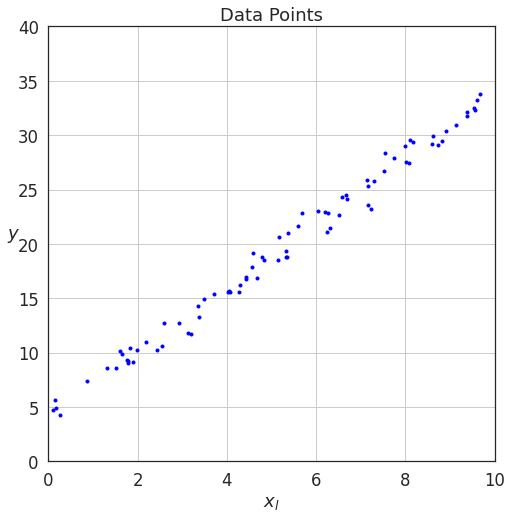

In [ ]:
# Visualising the training set
sns.set_style("white")
f = plt.figure(figsize=(8, 8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

plt.plot(X_train, y_train, "b.")
plt.title("Data Points")
plt.grid(True)
plt.xlabel("$x_l$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,10,0,40])

plt.show()

We have a training set consisting a single feature so we will fit a simple linear regression model with one feature. It's form is: y = w0 + w1x1
As discussed in the lectures, we add a special dummy feature x0 and set it to 1. We create a helper function for that

In [ ]:
def add_dummy_feature(x):
  '''add a dummy feature to the data set.
  Args:
    x : Training dataset
  Returns:
    Training dataset with an addition of dummy feature
  '''
  #np.ones(x.shape[0]) create a vector of 1's having the same number of rows as number of samples in dataset
  return np.column_stack((np.ones(x.shape[0]), x))

In [ ]:
# Testing the above function
train_matrix = np.array([[1,2,3], [4,5,6]]) # each feature is a 3D vector.
train_matrix = add_dummy_feature(train_matrix)
train_matrix

array([[1., 1., 2., 3.],
       [1., 4., 5., 6.]])

In [ ]:
# Applying the function to X_train
X_train = add_dummy_feature(X_train)
X_train

array([[1.        , 4.78140137],
       [1.        , 5.16415042],
       [1.        , 6.31377226],
       [1.        , 6.20706031],
       [1.        , 0.17671464],
       [1.        , 5.59973672],
       [1.        , 7.98486455],
       [1.        , 3.13052706],
       [1.        , 9.61311987],
       [1.        , 8.82508977],
       [1.        , 7.16358683],
       [1.        , 9.37522848],
       [1.        , 9.12488597],
       [1.        , 1.77501979],
       [1.        , 2.6012348 ],
       [1.        , 6.56867587],
       [1.        , 8.10458676],
       [1.        , 9.38856432],
       [1.        , 5.31292297],
       [1.        , 7.14356933],
       [1.        , 6.69794637],
       [1.        , 7.74519085],
       [1.        , 4.03981645],
       [1.        , 4.82838374],
       [1.        , 4.05951112],
       [1.        , 9.66525628],
       [1.        , 7.54036431],
       [1.        , 6.26508269],
       [1.        , 4.27604665],
       [1.        , 2.4322489 ],
       [1.

# Model

In [ ]:
def predict(X,w):
  '''prediction of output label for a given input.
  Args:
    X: Feature matrix of shape (n, m+1)
    w: Weight vector of shape (m+1, n)

  returns:
    y: Predicted label vector of shape (n,).
  '''
  #check to make sure the feature matric and weight vector have compatible shapes
  assert X.shape[-1] == w.shape[0], "X and w don't have compatible dimensions"
  return X @ w

In [ ]:
def preprocess(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
    X_train = add_dummy_feature(X_train)
    return X_train, X_test, y_train, y_test

In [ ]:
def generate_examples(n):
    X = 10 * np.random.random(n, )
    y = w0 + w1 * X
    return preprocess(X, y)

In [ ]:
# Test it with the examples generated using above function
X_train, X_test, y_train, y_test = generate_examples(100)
y_hat =  predict (X_train, np.random.rand(2,))
y_hat

array([3.11117961, 1.80496035, 1.52052244, 3.28590497, 1.8829792 ,
       0.47062329, 0.52381604, 0.6134475 , 2.78467739, 2.90815489,
       1.45597837, 3.0937567 , 1.31006375, 1.17148194, 3.1608466 ,
       0.07739695, 0.05166752, 2.45064832, 1.21108621, 2.09253049,
       3.64918995, 2.65228827, 0.4249691 , 0.15806539, 2.05408994,
       3.34072816, 0.13826563, 0.48665031, 2.10144583, 1.95642468,
       0.44117887, 2.48573429, 2.88827186, 1.13803556, 3.03450326,
       0.34544089, 0.22359193, 3.3234503 , 1.28255395, 1.9898037 ,
       1.63801549, 0.69232452, 3.04226994, 2.915204  , 3.30053764,
       1.69925362, 2.46238276, 0.83557447, 3.13041657, 2.60593461,
       2.28734966, 1.17410199, 3.37248373, 3.48942657, 0.26387391,
       0.43447481, 2.10182257, 1.18828899, 2.20223502, 1.32833614,
       1.08851899, 3.76873878, 3.22209352, 3.70728356, 2.07369487,
       2.07836092, 2.7391416 , 0.35917144, 0.97852859, 3.6225094 ,
       1.85779792, 3.18649123, 2.20157667, 3.21545426, 0.54375

# Loss

In [ ]:
def loss(X,y,w=None):
  '''Calculates loss for a model based on known labels

  Args:
    x: Feature matrix for given inputs
    y: Output label vector as predicted by the given model
    w: weight vector
  
  Returns:
    Loss
  '''
  if w is None:
        w = np.zeros(X.shape[1])
  e = predict(X,w) - y
  return (1/2) * (np.transpose(e) @ e)

In [ ]:
X = np.array([[1,3,2,5],[1,9,4,7]])
y = np.array([6,11])
w = np.array([1,1,1,1])
loss(X, y, w)

62.5

In [ ]:
# RMSE 
def rmse(X, y):
    return np.sqrt(2/X.shape[0] * loss(X, y))

In [ ]:
rmse(X_train, y_train)

20.122271692195536

In [ ]:
X_train, X_test, y_train, y_test = generate_examples(100)
loss(X_train, y_train, np.array([3,4]))  #Since weight vector is (3,4), there's no loss

944.9076108309515

In [ ]:
# Generating a weight vector
w = np.random.rand(2,)

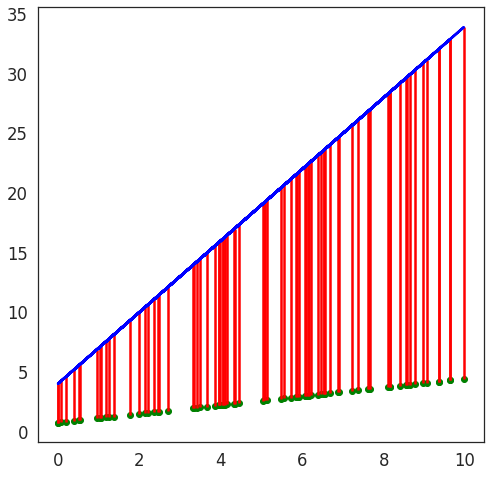

In [ ]:
y_new = predict(X_train, w)
fig, axes = plt.subplots(figsize=(8,8))
axes.plot(X_train[:,1], y_train, c='b', label='Training')
axes.scatter(X_train[:,1], y_new, c='g', label='Error')
axes.vlines(X_train[:,1], y_new, y_train, colors="r", label="loss")

# Optimization

Normal equation 
 The weight vector is estimated by matrix multiplication of pseudo-inverse of feature matrix and the label vector
 The vectorised implementation is fairly straightforward

*   We make use of np.linalg.pinv for calculating pseudoinverse of the feature matrix

In [ ]:
def normal_equation(X,y):
  '''Estimates parameters of the linear regression model with normal equation
  Args:
    X: Feature matrix for given inputs
    y: Actual label vector

  Returns:
    Weight vector
  '''
  return np.linalg.pinv(X) @ y

In [ ]:
normal_equation(X_train, y_train)

array([4., 3.])

Gradient Descent (GD)

GD is implemented as follows:
*   randomly initialise w to 0
*   iterate until *convergence*:
  *   calculate partial derivative w.r.t weight vector
  *   calculate new values of weights
  *   update weights to new values simultaneously

we use number of epochs as a convergence criteria in this implementation

In [ ]:
# Setting a learning rate
lr = 0.0001

In [ ]:
def calculate_gradient(X, y, w):
  '''Calculates gradients of loss function w.r.t weight vector on training set.
  Args:
    X: feature matrix for training data
    y: label vector for training data
    w: weight vector

  Returns:
    A vector of gradients
  '''
  return np.transpose(X) @ (predict(X,w) - y)

In [ ]:
def update_weights(w, grad, lr):
  '''Updates the weights based on the gradient of the loss function
  Weight updates are carried out with the following formula:
    w_new := w_old - lr*grad

  Args:
    1. w: weight vector
    2. grad: gradient of loss w.r.t w
    3. lr: learning rate
  
  Returns:
    Updated weight vector
  '''
  return (w-lr*grad)

In [ ]:
# Implementing GD 

def gradient_descent(X:np.ndarray, y:np.ndarray, lr:float, num_epochs:int):
  '''Estimates parameters of linear regression model through gradient descent.
  Args:
    X: Feature matrix for training data
    y: label vector for training data
    lr: learning rate
    num_epochs: number of training steps

  Returns:
    weight vector: final weight vector
    error vector across different iterations weight vectors across different iterations
  '''

  w_all = [] #all parameters across iterations
  err_all = [] #all errors across iterations

  #parameter vector initialised to [0,0]
  w = np.zeros((X.shape[1]))

  #gradient descent loop
  print()
  for i in np.arange(0, num_epochs):
    w_all.append(w)

    #calculate error due to the current weight vector: Note that here we use loss function to calculate the loss 
    err_all.append(loss(X,y,w))

    #gradient calculation
    dJdW = calculate_gradient(X, y, w)

    #print stats every 100 iterations
    if (i%100) == 0:
      print('Iteration #: %d, loss: %4.2f' %(i, err_all[-1]))

    #weight vector update
    w = update_weights(w, dJdW, lr)

  return w, err_all, w_all

In [ ]:
def plot_learning_curves(err_all):
  plt.plot(err_all)
  plt.xlabel("iteration #")
  plt.ylabel("Loss: $J(\mathbf{w})$")

In [ ]:
w, err_all, w_all = gradient_descent(X_train, y_train, lr=0.0001, num_epochs=2000)
plot_learning_curves(err_all)

Learning Rate and Convergence

Let's vary the learning rate and observe the change in the convergence characteristics of GD
We will use:
*   α = {1e-6,1e-4,1e-1} to run GD for 2000 epochs each
*   Compare the convergence characteristics

In [ ]:
w, err_all, w_all = gradient_descent(X_train, y_train, lr=1e-6, num_epochs=2000)
plot_learning_curves(err_all)
plt.title("lr=1e-6")

In [ ]:
t0, t1 = 200, 100000
def learning_schedule(t):
  return t0/(t+t1)

In [ ]:
# Mini Batch Gradient Descent
# The ket idea here is to perform weight updates by computing gradient on batches of small number of examples


def mini_batch_gd(X:np.ndarray, y:np.ndarray, sum_iters:int, minibatch_size:int):
  '''Estimates parameters of linear regression model through GD
  Args:
    1. X: Feature matrix for training data
    2. y: Label vector for training data
    3. num_iters: Number of iterations

  Returns:
    Weight vector: Final weight vector
    Error vector across different iterations 
    Weight vectors across different iterations
    '''
  w_all = [] #all parameters across iterations
  err_all = [] #error across iterations

  #parameter vector initialised to [0,0]
  w = np.zeros((X.shape[1]))
  t = 0

  for epoch in range(sum_iters):
    shuffled_indices = np.random.permutation(X.shape[0])
    X_shuffled = X[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, X.shape[0], minibatch_size):
      t += 1
      xi = X_shuffled[i:i+minibatch_size]
      yi = y_shuffled[i:i+minibatch_size]
      err_all.append(loss(xi,yi,w))

      gradients = 2/minibatch_size * calculate_gradient(xi,yi,w)
      lr = learning_schedule(t)

      w = update_weights(w, gradients, lr)
      w_all.append(w)

    return w, err_all, w_all

In [ ]:
# Testing above function

minibatch_size = 10
sum_iters = 40

X_train, X_test, y_train, y_test = generate_examples(100)
w, err_all, w_all = mini_batch_gd(X_train, y_train, sum_iters, minibatch_size)

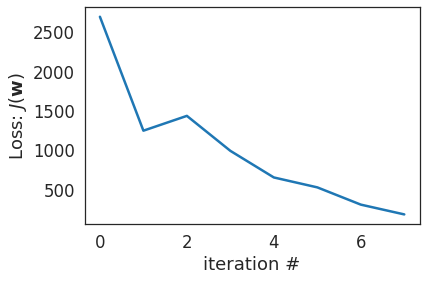

In [ ]:
plot_learning_curves(err_all)

In [ ]:
#Stochastic Gradient Descent
# The key here is to perform weight updates by computing gradient on one example at a time
def sgd(X:np.ndarray, y:np.ndarray, num_epochs:int):
  '''Estimates parameters of linear regression model through gradient descent
 
  Args:
    1. X: Feature matrix for training data
    2. y: Label vector for training data
    3. num_epochs: Number of epochs
  
  Returns:
    Weight vector: Final weight vector
    Error vector across different iterations
    Weight vectors across different iterations
  '''
  w_all = [] # all paramters across iterations
  err_all = [] # error across iterations

  # Parameter vector intitialised to [0,0]
  w = np.zeros((X.shape[1]))
  for epoch in range(num_epochs):
    for i in range(X.shape[0]):
      random_index = np.random.randint(X.shape[0])
      xi = X[random_index:random_index + 1]
      yi = y[random_index:random_index + 1]
      err_all.append(loss(xi, yi, w))

      gradients = 2*calculate_gradient(xi,yi,w)
      lr = learning_schedule(epoch * X.shape[0] + i)

      w = update_weights(w, gradients, lr)
      w_all.append(w)
  return w, err_all, w_all


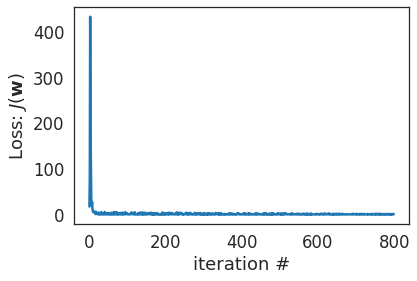

In [ ]:
w, err_all, w_all = sgd(X_train, y_train, 10)
plot_learning_curves(err_all)